### 웹 크롤링
- 웹 크롤러(Web Crawler)는 웹문서, 이미지 등을 주기적으로 수집하여 자동으로 데이터베이스화하는 프로그램
- 크롤러가 하는 작업을 웹 크롤링(Web Crawling)이라 함
- requests와 beautifulsoup4 패키지 사용


### 1. 웹 문서 전체 가져오기
- urllib.request 패키지

In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bs


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
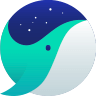
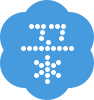

In [2]:
html = urlopen("https://www.naver.com")
soup = bs(html, "html.parser")
print(soup)

- requests 패키지


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
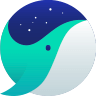
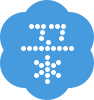

In [3]:
import requests
from bs4 import BeautifulSoup as bs

html = requests.get("https://www.naver.com")
soup = bs(html.text, "html.parser")     # requests를 사용하고 get을 이용하여 가져올 때 .text를 포함하여 가져와야한다.
print(soup)

### 2. html 태그에서 원하는 정보 추출하기
- html 태그를 이용하는 방법
- CSS Selector를 이용하는 방법

- html 태그: 
- find("태그") - 첫번째 태그만 검색 / 
- find_all("태그") - 태그 전체를 검색(List로 반환)

In [4]:
# class를 이용한 태그 검색
find_div = soup.find('div', class_='group_nav')
find_div

# id를 이용한 태그 검색
find_div = soup.find('div',id="NM_FAVORITE")
find_div

<div class="gnb_inner" id="NM_FAVORITE">
<div class="group_nav">
<ul class="list_nav type_fix">
<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
<li class="nav_item"><a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a></li>
<li class="nav_item"><a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a></li>
<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" 

In [5]:
# find_all 사용
find_div = soup.find('div',class_="group_nav")
find_lst = find_div.find_all("li")
for item in find_lst:
    print(item.get_text())  # 모든 태그를 제거하고 텍스트만 남김
    print(item.text)        # 태그 내에 있는 텍스트를 추출
    print(item.find("a")["href"])  # 태그의 속성을 출력


메일


메일

https://mail.naver.com/
카페
카페
https://section.cafe.naver.com/
블로그
블로그
https://section.blog.naver.com/
지식iN
지식iN
https://kin.naver.com/
쇼핑
쇼핑
https://shopping.naver.com/
쇼핑LIVE
쇼핑LIVE
https://shoppinglive.naver.com/home
Pay
Pay
https://order.pay.naver.com/home

TV


TV

https://tv.naver.com/
사전
사전
https://dict.naver.com/
뉴스
뉴스
https://news.naver.com/
증권
증권
https://finance.naver.com/
부동산
부동산
https://land.naver.com/
지도
지도
https://map.naver.com/
VIBE
VIBE
https://vibe.naver.com/
책
책
https://book.naver.com/
웹툰
웹툰
https://comic.naver.com/


#### CSS Selector

In [6]:
css_soup = soup.select("#NM_FAVORITE > div.group_nav > ul.list_nav.type_fix")  # 리스트 형식으로 출력
css_a = css_soup[0].find_all("a")
for a in css_a:
    print(a.text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV


#### [크롤링 연습]
- 네이버 지식인에서 "선릉역"으로 검색 후 검색결과 가져오기

In [7]:
import requests  # urllib을 이용해도 됨 requests.get(url)을 url.open(url)로 변경
from bs4 import BeautifulSoup as bs

# 크롤링 대상 url
url = "https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD&page=1"

html = requests.get(url)  # url에서 데이터 요청
soup = bs(html.text, "html.parser")  # 요청 데이터를 파싱 진행

# css를 이용한 태그 검색
ul_soup = soup.select("#s_content > div.section > ul")

# 검색된 태그에서 다시 li 전체를 검색
li_soup = ul_soup[0].find_all("li")

# 검색된 li태그에서 원하는 텍스트 크롤링(추출)
print(li_soup[0].find("dt").get_text())  # 제목
print(li_soup[0].find("dd").get_text())  # 날짜
print(li_soup[0].select("dl > dd:nth-child(3)")[0].get_text())  # 요약 내용



볼 수 있을까요? (선릉역 20대후반/여 질염)


2022.03.29.
예전에 한 번 선릉역 근처에 있는 산부인과에서 질염 치료제로 약 처방 받고 복용했는데요, 다시 재발한 거 같아요 재발 심하다는 말 듣기는 했는데 막상 또 걸리니까... 


#### [미션] 1페이지 검색 결과에서 전체 내용 가져오기
- 제목, 등록일, 요약 부분을 각각 가져와 DataFrame으로 저장

In [8]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# 크롤링 대상 url
url = "https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD&page=1"

html = requests.get(url)  # url에서 데이터 요청
soup = bs(html.text, "html.parser")  # 요청 데이터를 파싱 진행

# css를 이용한 태그 검색
ul_soup = soup.select("#s_content > div.section > ul")

li_soup = ul_soup[0].find_all("li")

nav_kin = []

for li in li_soup:
    title = li.find("dt").get_text().replace("\n","")
    date = li.find_all("dd")[0].get_text()
    summary = li.select("dl > dd:nth-child(3)")[0].get_text()
    
    nav_kin.append({ "제목" : title,
                    "등록일" : date, 
                    "요약" : summary })
    
df = pd.DataFrame(nav_kin)
df

,제목,등록일,요약
0,볼 수 있을까요? (선릉역 20대후반/여 질염),2022.03.29.,예전에 한 번 선릉역 근처에 있는 산부인과에서 질염 치료제로 약 처방 받고 복용했는...
1,성수동에서 지하철 타서 선릉역까지 가,2022.02.05.,성수동에서 지하철 타서 선릉역까지 가는 거로 1회용 지하철 카드? 그거 했는데......
2,동서울터미널에서 선릉역 까지 노선 좀,2022.01.02.,"동서울터미널에서 선릉역 까지 노선 좀 알려주세요? ""강변 - 잠실나루 - 잠실 -..."
3,선릉역에서 수인분당선,2022.04.01.,선릉역에서 수인분당선을 타려면 어디 출구로 가야하나요? 타는곳이 여러곳이잖아요......
4,증미역에서 선릉역까지 가는 가장 빠른...,2021.09.12.,9호선일반 증미역에서 선릉역9호선급행까지 가는 방법이... 추천해주세요 출퇴근시간이...
5,선릉역 미용실을 찾아요!!,2021.05.13.,안녕하세요~ 2018년 10월쯤에 선릉역 부근 미용실에서 머리를 했었는데 어느 미용...
6,선릉역누네안과 망막전문의 소개부탁드립,2022.02.15.,"선릉역누네안과 망막전문의 소개부탁드립니다,망막이 찢어졌다구 하는데, 전문의 추천부탁..."
7,선릉역이랑 제일 가까운 공원 없나요?,2022.01.08.,선릉역이랑 제일 가까운 공원 없나요? 가깝고 큰공원으로는 도산공원있습니다. 아래는...
8,선릉역에 있는 안과 예약했는데,2021.10.08.,저희 엄마 노안 때문에.. 치료 예약을 해놨습니다. 인터넷에서 보기로는 노안도 치료...
9,논현동 선릉역 신사역 근처 다이어트...,2021.12.13.,선릉역 신사역 논현동 쪽에 다이어트 도움 받을 곳 찾아요. 안녕하세요! 세상을 건...


### 검색어를 이용한 크롤링
- urllib 패키지의 parse 모듈

In [9]:
from urllib import parse
text = "선릉역"


# 컴퓨터 언어로 인코딩
enc = parse.quote(text)  
display(enc)


# 컴퓨터 언어를 사람이 알아볼 수 있는 상태로 디코딩
dec = parse.unquote(enc)
display(dec)

'%EC%84%A0%EB%A6%89%EC%97%AD'

'선릉역'

In [10]:
# parse 모듈 사용법

import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from urllib import parse

schtext = input("검색어를 입력하세요:")

# 크롤링 대상 url
url = "https://kin.naver.com/search/list.naver?query=" + parse.quote(schtext) +"&page=1"

html = requests.get(url)  # url에서 데이터 요청
soup = bs(html.text, "html.parser")  # 요청 데이터를 파싱 진행

# css를 이용한 태그 검색
ul_soup = soup.select("#s_content > div.section > ul")

li_soup = ul_soup[0].find_all("li")

nav_kin = []

for li in li_soup:
    title = li.find("dt").get_text().replace("\n","")
    date = li.find_all("dd")[0].get_text()
    summary = li.select("dl > dd:nth-child(3)")[0].get_text()
    
    nav_kin.append({ "제목" : title,
                    "등록일" : date, 
                    "요약" : summary })
    
df = pd.DataFrame(nav_kin)
df






검색어를 입력하세요:안녕


,제목,등록일,요약
0,안녕하세요. 엑셀 문의드립니다.,2022.04.27.,안녕하세요. 엑셀 데이터를 자동으로 나열을 하고싶은데 엑셀 파일로 올려드리오니......
1,안녕하세요.,2022.03.11.,안녕하세요. 제가 주걱턱이 좀 있는 편이라서 치과에서 교정을 하라고 했습니다. 턱이...
2,안녕하세요 미니폴 재출시,2021.11.24.,안녕하세요 작년에 미니폴 재출시에 지식인에 답변 주셨었는데요 재출시 안되나요?......
3,안녕하세요 소방공무원 시험 omr 문의,2022.04.19.,안녕하세요 혹시 성적발표 후 이상할 시에 omr 확인 가능한 절차가 있을까요..? ...
4,안녕하세여!,2022.02.28.,안녕하세요 중2여자 청소년입니다.저번주부터 오랫동안한자리에 앉았다 일어나면... 안...
5,안녕하세요!,2022.03.07.,안녕하세요 문의드릴게 있습니다 에어비앤비 예약요청을 하고 결제까지... 안녕하세요....
6,안녕하세요~,2022.03.07.,안녕하세요~ 사진에서 보시다싶이 석류즙을 몇개월째 먹고있는데요 근데 이게 찬... ...
7,안녕하세요,2022.04.15.,안녕하세요 영국에서 logistis 이용하여 친구가 선물을 보냈는데 관세로 1000...
8,안녕하세요 Hp.deskjet 252,2022.03.14.,안녕하세요 Hp.deskjet 2520hc프린터 쓰고있습니다 Pc에서문서... 급합...
9,안녕하세요 궁금한게 있는데요,2022.04.13.,안녕하세요 궁금한게 있는데요 운동 너무 안하는거랑 병원에 실려가는거랑 무슨 상관이 ...


### 4. 검색된 내용 전체(페이지 이동)

In [11]:
# parse 모듈 사용법

import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from urllib import parse

schtext = input("검색어를 입력하세요:")
nav_kin = []

for page in range(1,11):
    # 크롤링 대상 url
    url = "https://kin.naver.com/search/list.naver?query=" + parse.quote(schtext)
    url = url +"&page=" + str(page)

    html = requests.get(url)  # url에서 데이터 요청
    soup = bs(html.text, "html.parser")  # 요청 데이터를 파싱 진행

    # css를 이용한 태그 검색
    ul_soup = soup.select("#s_content > div.section > ul")

    li_soup = ul_soup[0].find_all("li")



    for li in li_soup:
        title = li.find("dt").get_text().replace("\n","")
        date = li.find_all("dd")[0].get_text()
        summary = li.select("dl > dd:nth-child(3)")[0].get_text()

        nav_kin.append({ "제목" : title,
                        "등록일" : date, 
                        "요약" : summary })

df = pd.DataFrame(nav_kin)
df

검색어를 입력하세요:우울증


,제목,등록일,요약
0,우울증 환자 조루증 질문입니다.,2022.03.09.,... 우울증이 생긴 후 부터 심한 조루증이 생겼습니다. 아직... 우울증이 회복이...
1,우울증 질문,2022.04.20.,제가 우울증이 있는 것 같아서 정신과에 다녀오고 약을... 이건 우울증이 아닌가요?...
2,정신병원(우울증),2022.04.25.,... 제가 인터넷에서 우울증 자가진단을 하였는데 30점이... 제대로 우울증 테스...
3,청소년 우울증 해결법,2022.03.26.,제가 왜 우울증인지도 이젠 잘 모르겠어요 엄마아빠한텐 제가 죽을때까지 절대 말 안할...
4,우울증약 평생,2022.04.29.,중증 우울증환자 입니다 양심있는 의사분의 답을 원합니다 우울증 완치라는것이 있나요 ...
...,...,...,...
95,우울증 있었던 고1 학생인데요,2022.03.15.,우울증 있었던?? 고1 학생인데요 중1 때 우울증 진단 받고 한 1년간 병원 다니다...
96,우울증인가요?,2022.03.04.,... 그땐 몰랐는데 이제 와서 보니 우울증 증상이었나 싶어서... 이런 증상도 우...
97,우울증 약,2022.04.30.,제가 불안 장애와 우울증 약을 먹고있는대 제가지금 먹고있는 약이 의존성이나 중독성이...
98,우울증과 조울증의 차이는?,2022.02.01.,우울증과 조울증의 차이는뭔가요? 우울증도 망상 환청을 할수있나요? 조울증은... 그...
